# **01. About The Data Set**

- The Data Set is Downloaded from Kaggle at this [link](https://www.kaggle.com/datasets/zahidmughal2343/video-games-sale/data).

- `Rank` – Position in sales ranking

- `Name` – Game title

- `Platform` – Console/PC system

- `Year` – Release year

- `Genre` – Type of game (Action, RPG, etc.)

- `Publisher` – Company that released the game

- `NA_Sales` – North America sales (in millions)

- `EU_Sales` – Europe sales (in millions)

- `JP_Sales` – Japan sales (in millions)

- `Other_Sales` – Sales in other regions (in millions)

- `Global_Sales` – Total worldwide sales (in millions)

In [272]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [273]:
df=pd.read_csv("video games sales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [275]:
print(f"The Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The Dataset has 16598 rows and 11 columns.


In [276]:
# No. of missing values
df.isnull().sum().sort_values(ascending=False)

Year            271
Publisher        58
Rank              0
Name              0
Platform          0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [277]:
# percentage of missing values
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Year            1.632727
Publisher       0.349440
Rank            0.000000
Name            0.000000
Platform        0.000000
Genre           0.000000
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

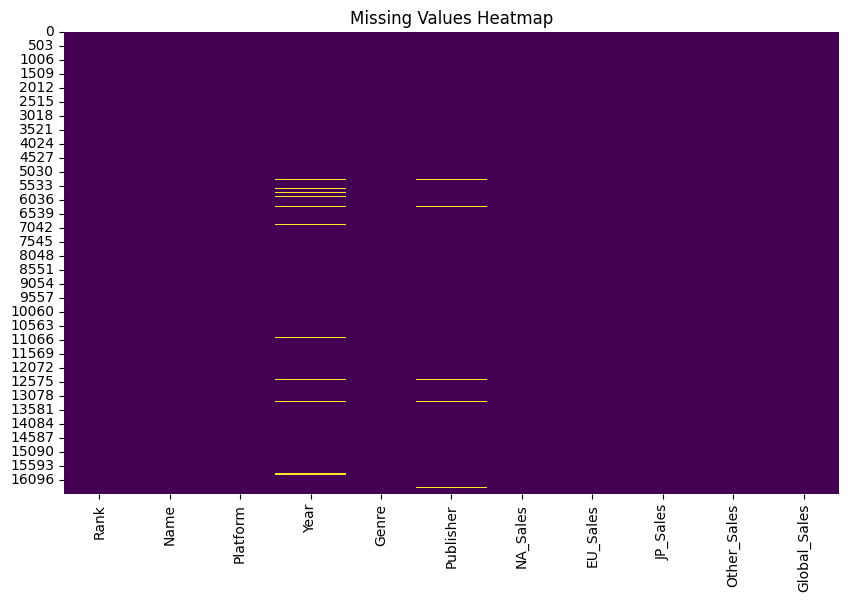

In [278]:
# plot the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

`Since there is less percentage of missing values . So, we can drop the missing values `

In [279]:
print('Shape Before Dropping Missing Values:',df.shape)

Shape Before Dropping Missing Values: (16598, 11)


In [280]:
df.dropna(inplace=True)

In [281]:
print('Shape After Dropping Missing Values:',df.shape)

Shape After Dropping Missing Values: (16291, 11)


In [282]:
# Checking Again Missing Values
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [283]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [284]:
df['Year'] = df['Year'].astype('Int64')

In [285]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **1. Univariate Analysis**

In [286]:
# Number of Games per Genre
df['Genre'].value_counts()

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

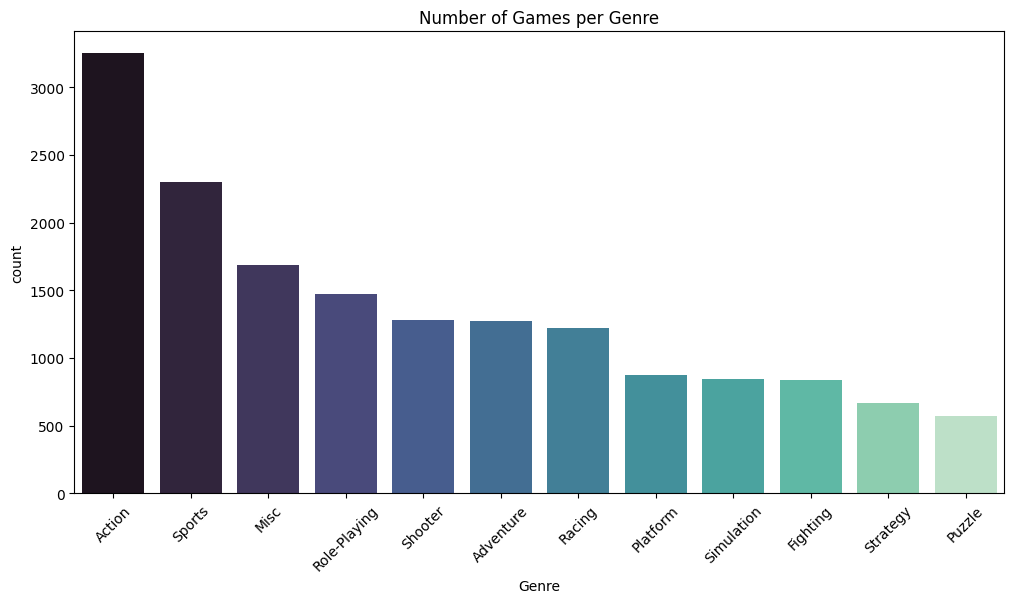

In [287]:
# Sort genre counts
order = df['Genre'].value_counts().index
# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='Genre', data=df, order=order,palette='mako')
plt.xticks(rotation=45)
plt.title('Number of Games per Genre')
plt.show()

In [288]:
df['Publisher'].value_counts().head(30)

Publisher
Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                682
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Acclaim Entertainment                      184
D3P

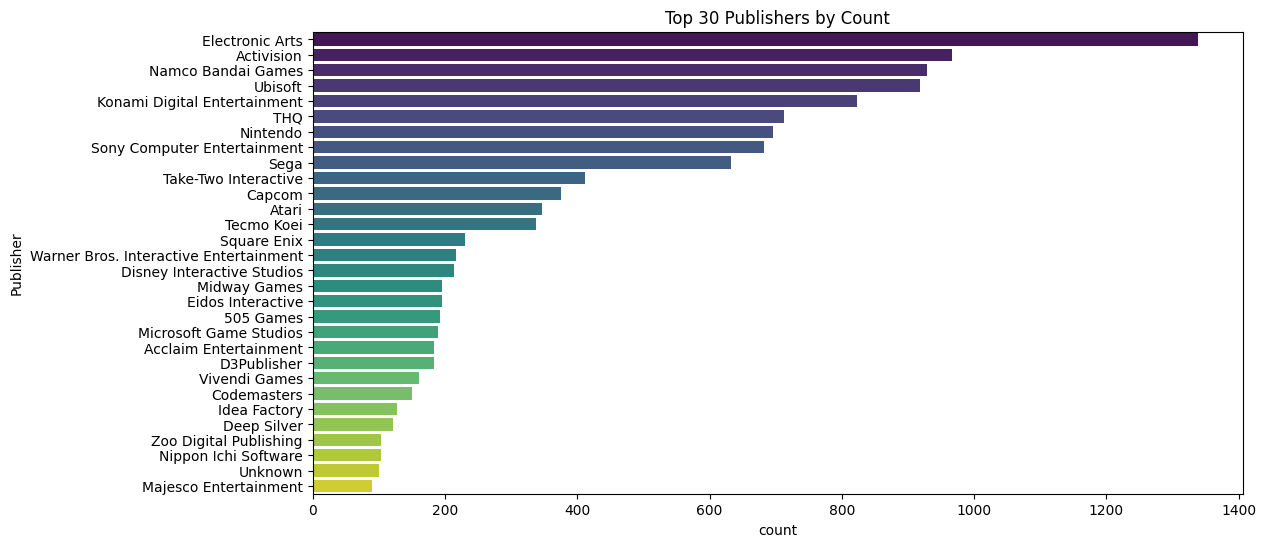

In [289]:
# Get top 30 publishers by count
top_publishers = df['Publisher'].value_counts().head(30)

# Plot the top 30 publishers
plt.figure(figsize=(12,6))
sns.countplot(y='Publisher', data=df, order=top_publishers.index, palette="viridis")
plt.title('Top 30 Publishers by Count')
plt.show()

In [290]:
df["Platform"].value_counts().head(20)

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
Name: count, dtype: int64

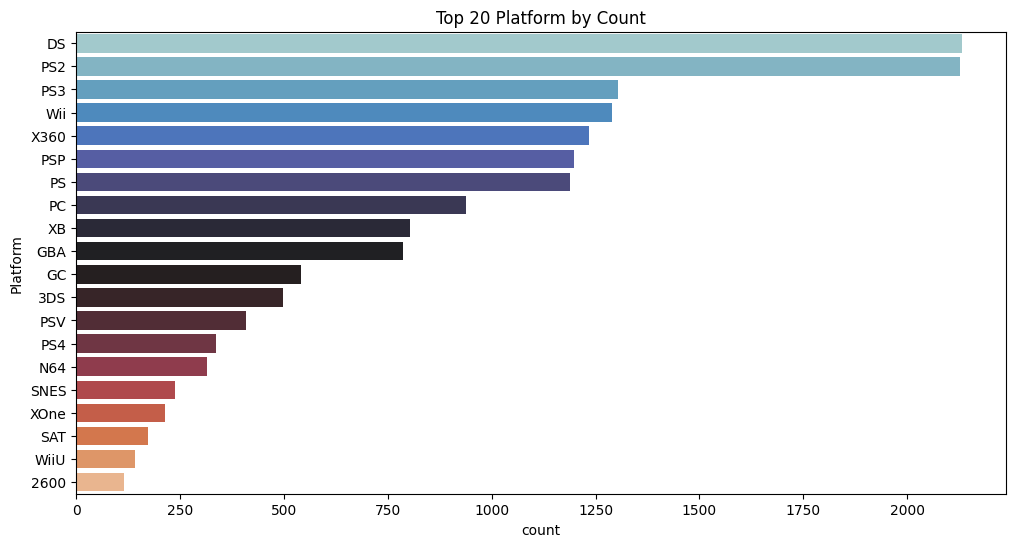

In [291]:
# Get top 30 publishers by count
top_platforms = df["Platform"].value_counts().head(20)

# Plot the top 20 publishers
plt.figure(figsize=(12,6))
sns.countplot(y='Platform', data=df, order=top_platforms.index, palette="icefire")
plt.title('Top 20 Platform by Count')
plt.show()

<Axes: xlabel='Year', ylabel='Density'>

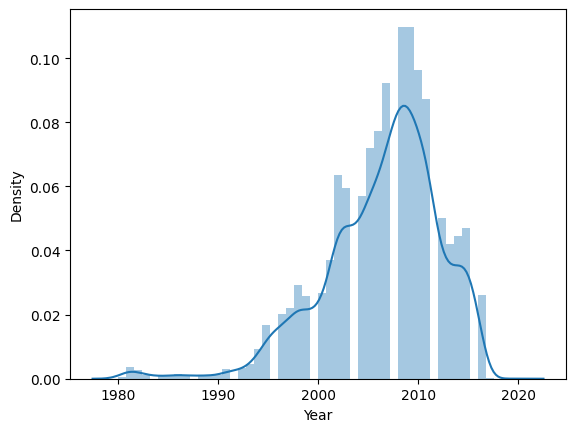

In [292]:
sns.distplot(df['Year'])

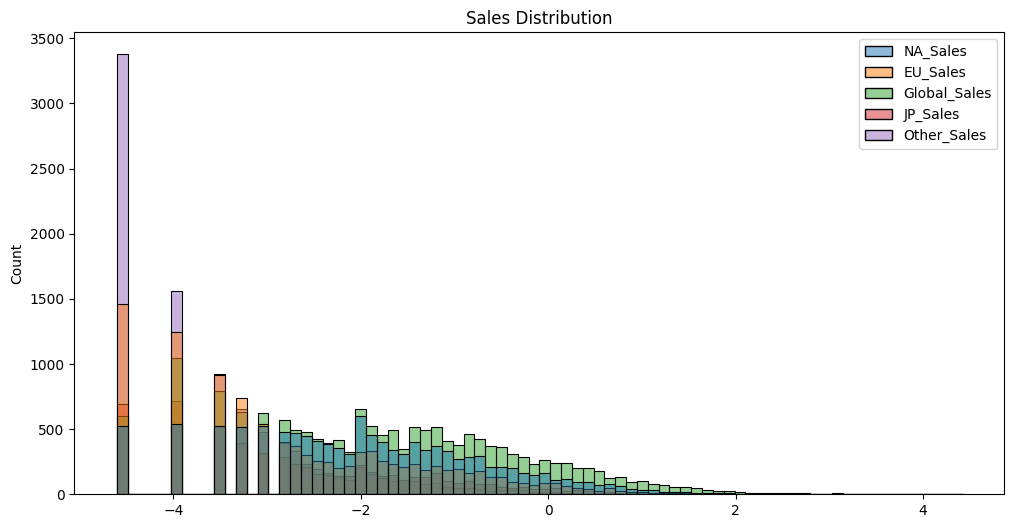

In [293]:
plt.figure(figsize=(12,6))
sns.histplot(data=np.log(df[['NA_Sales', 'EU_Sales', 'Global_Sales','JP_Sales','Other_Sales']]))
plt.title('Sales Distribution')
plt.show()

# **2. Bivariate Analysis**

In [294]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## **Top 10 Games According to Global Sales**

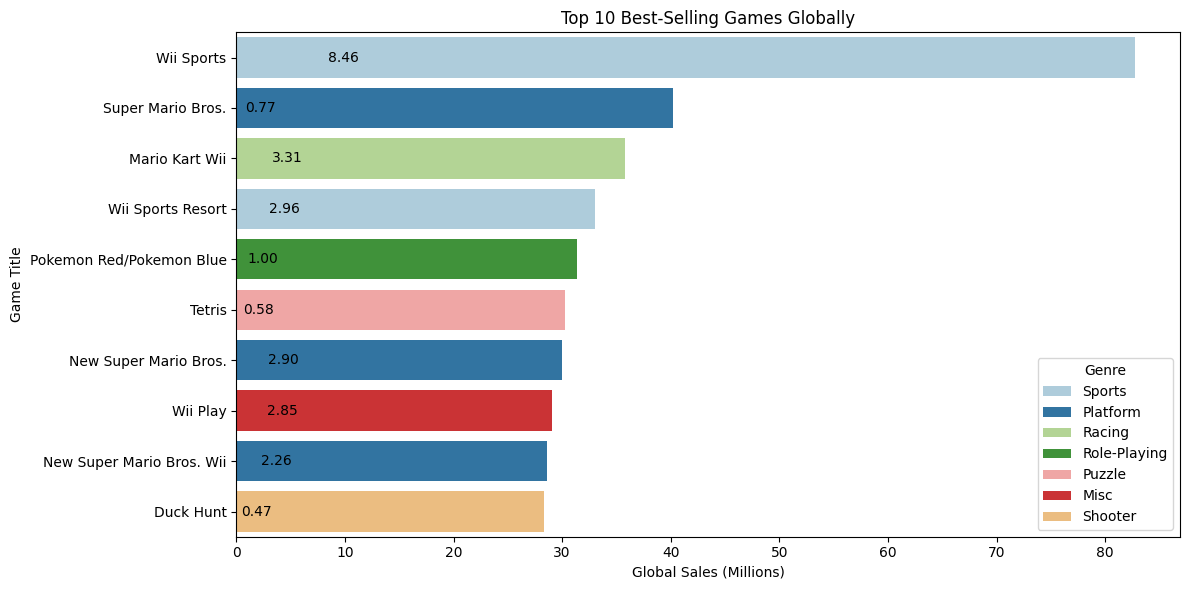

In [295]:
top_10_games = df.sort_values(by='Global_Sales', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Global_Sales', y='Name', data=top_10_games,hue='Genre',palette='Paired',dodge=False)
for index, value in enumerate(top_10_games['Other_Sales']):
    plt.text(value + 0.01, index, f'{value:.2f}', va='center')
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()


## **Top 10 Games According to North America Sales**

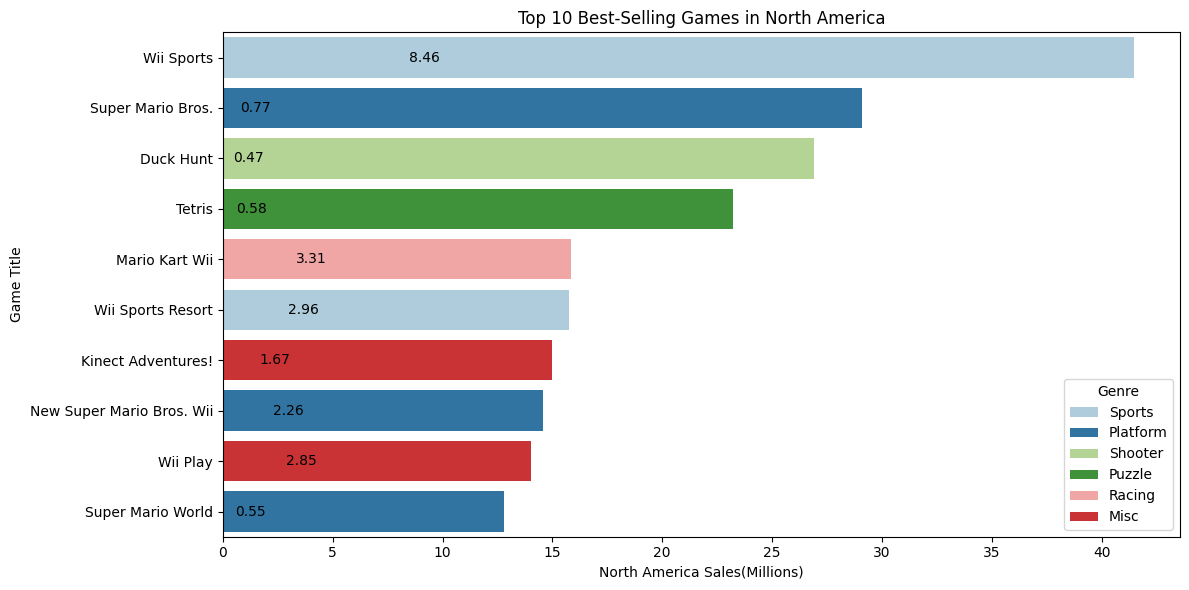

In [296]:
top_10_games_NA = df.sort_values(by='NA_Sales',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='NA_Sales', y='Name', data=top_10_games_NA,hue='Genre',
    palette='Paired',
    dodge=False)
for index, value in enumerate(top_10_games_NA['Other_Sales']):
    plt.text(value + 0.01, index, f'{value:.2f}', va='center')
plt.title('Top 10 Best-Selling Games in North America')
plt.xlabel('North America Sales(Millions)')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()

## **Top 10 Games According to Japan Sales**

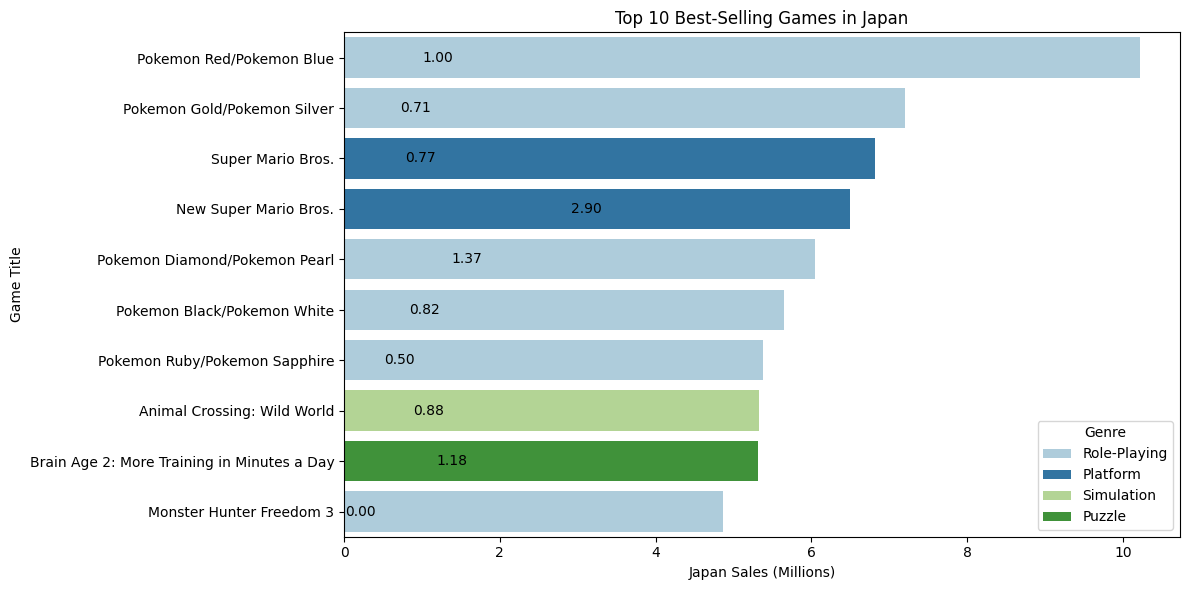

In [297]:
top_10_games_JP = df.sort_values(by='JP_Sales',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='JP_Sales', y='Name', data=top_10_games_JP, hue='Genre',palette='Paired',dodge=False)

for index, value in enumerate(top_10_games_JP['Other_Sales']):
    plt.text(value + 0.01, index, f'{value:.2f}', va='center')
    
plt.title('Top 10 Best-Selling Games in Japan')
plt.xlabel('Japan Sales (Millions)')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()

## **Top 10 Games According to Europe Sales**

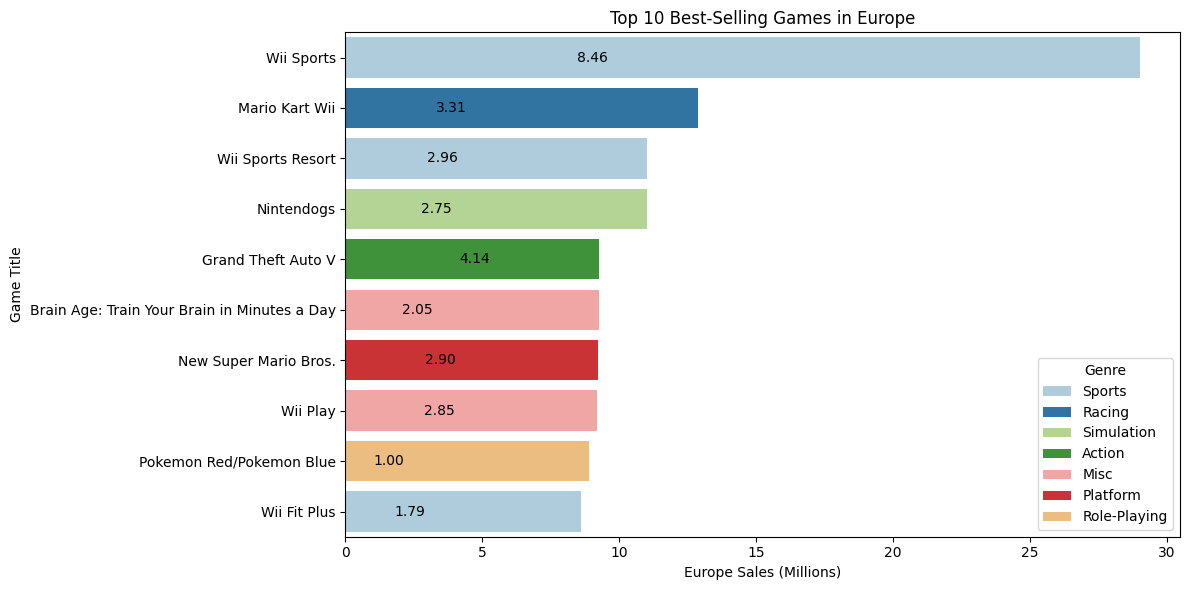

In [298]:
top_10_games_EU = df.sort_values(by='EU_Sales',ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='EU_Sales', y='Name', data=top_10_games_EU, hue='Genre',
    palette='Paired',
    dodge=False)
for index, value in enumerate(top_10_games_EU['Other_Sales']):
    plt.text(value + 0.01, index, f'{value:.2f}', va='center')

plt.title('Top 10 Best-Selling Games in Europe')
plt.xlabel('Europe Sales (Millions)')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()

## **Top 10 Games According to Other Continents Sales**

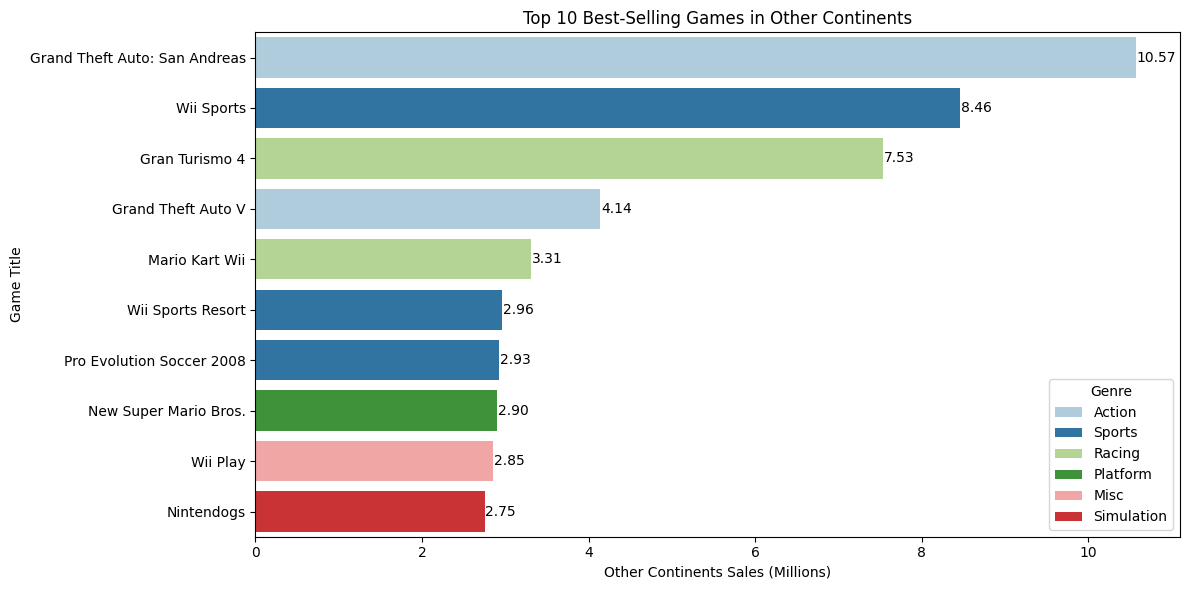

In [299]:
top_10_games_Other = df.sort_values(by=["Other_Sales"],ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Other_Sales',y='Name',data=top_10_games_Other,hue='Genre',palette='Paired',dodge=False)

for index, value in enumerate(top_10_games_Other['Other_Sales']):
    plt.text(value + 0.01, index, f'{value:.2f}', va='center')

plt.title('Top 10 Best-Selling Games in Other Continents')
plt.xlabel('Other Continents Sales (Millions)')
plt.ylabel('Game Title')
plt.tight_layout()
plt.show()

In [300]:
bins = [1980, 1990, 2000, 2010, 2020]
labels = ['1980s', '1990s', '2000s', '2010s']

df['Decade_Label'] = pd.cut(df['Year'], bins=bins, labels=labels, right=False)


In [301]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade_Label
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000s
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980s
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000s
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000s
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990s


## **Number of Games Released Per Year**

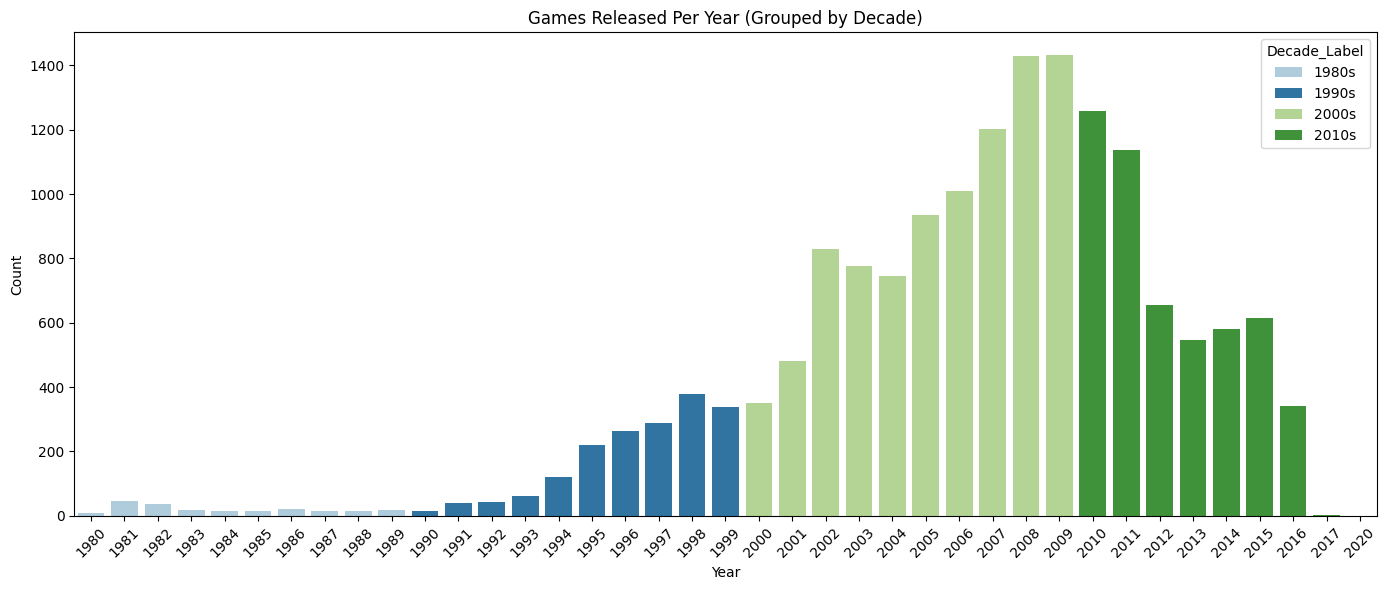

In [302]:
yearly_count = df.groupby(['Decade_Label', 'Year']).size().reset_index(name='Count')
plt.figure(figsize=(14,6))
sns.barplot(data=yearly_count, x='Year', y='Count', hue='Decade_Label', dodge=False, palette='Paired')
plt.title('Games Released Per Year (Grouped by Decade)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## **Games Released Per Decade by Genre**

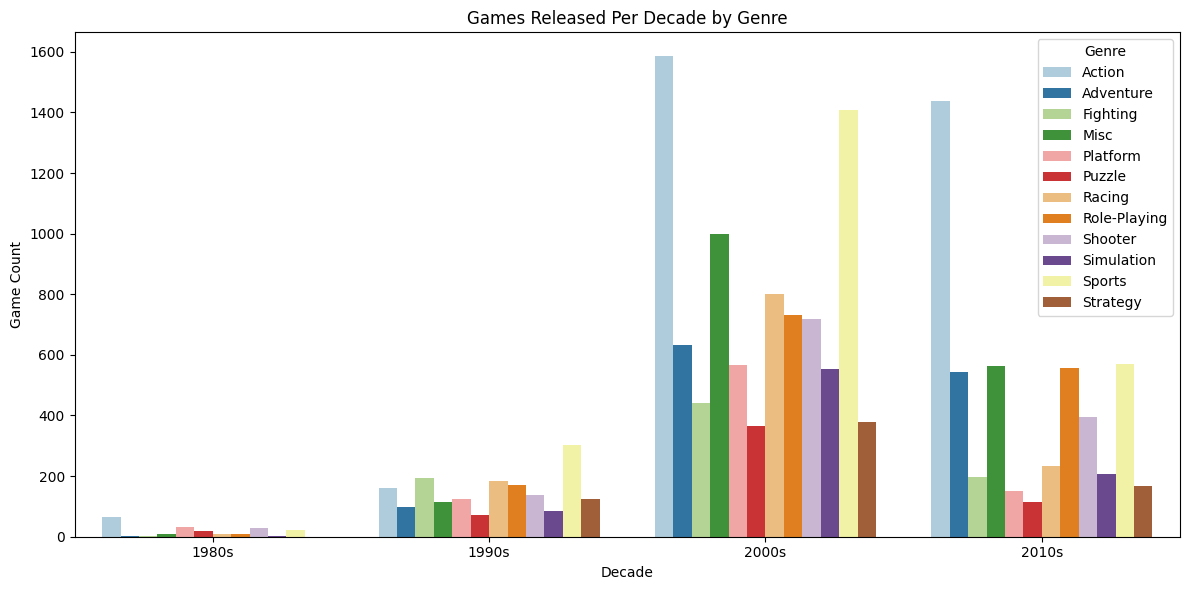

In [303]:
# Group by Decade and Genre
genre_decade_count = df.groupby(['Decade_Label', 'Genre']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=genre_decade_count, x='Decade_Label', y='Count', hue='Genre', palette='Paired')
plt.title('Games Released Per Decade by Genre')
plt.xlabel('Decade')
plt.ylabel('Game Count')
plt.tight_layout()
plt.show()


## **Regional Sales per Decade**

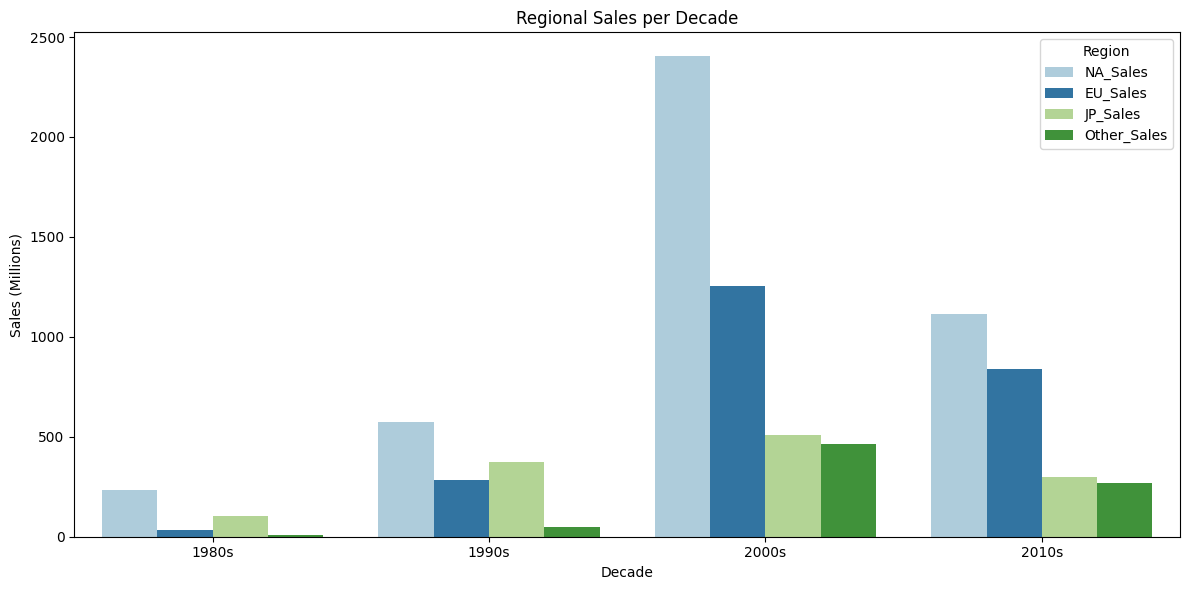

In [308]:
region_sales = df.groupby('Decade_Label')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()

# Melt for plotting
region_sales_melted = region_sales.melt(id_vars='Decade_Label', var_name='Region', value_name='Sales')

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=region_sales_melted, x='Decade_Label', y='Sales', hue='Region', palette='Paired')
plt.title('Regional Sales per Decade')
plt.ylabel('Sales (Millions)')
plt.xlabel('Decade')
plt.tight_layout()
plt.show()


## **Global Sales per Decade by Genre**

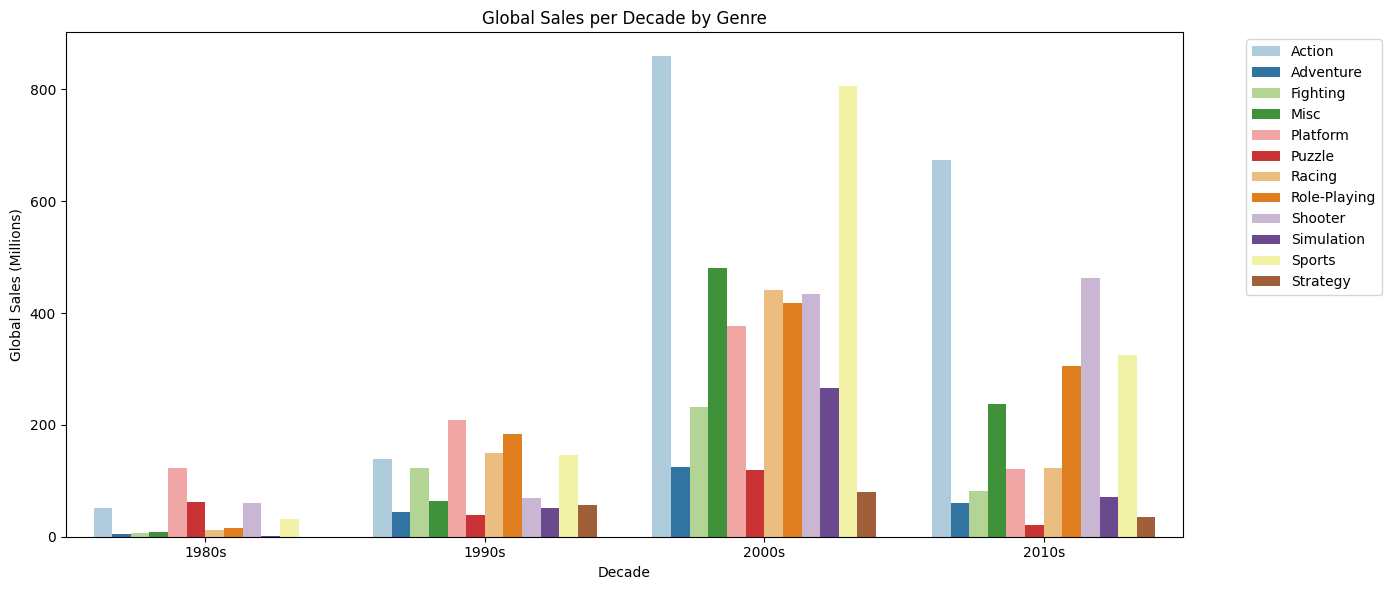

In [311]:
# Group and sum
genre_decade_sales = df.groupby(['Decade_Label', 'Genre'])['Global_Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(14,6))
sns.barplot(data=genre_decade_sales, x='Decade_Label', y='Global_Sales', hue='Genre', palette='Paired')
plt.title('Global Sales per Decade by Genre')
plt.xlabel('Decade')
plt.ylabel('Global Sales (Millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## **Global Sales per Decade by Top 5 Publishers**

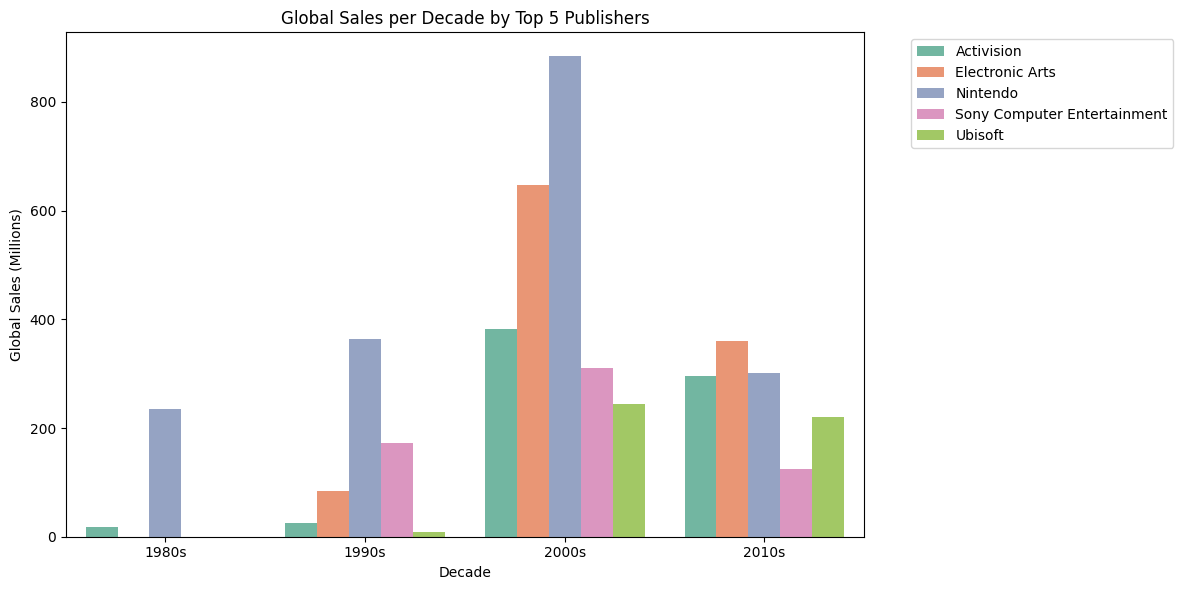

In [315]:
# Get top 5 publishers overall
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5).index

# Filter the dataframe
df_top_publishers = df[df['Publisher'].isin(top_publishers)]

# Group and sum
publisher_decade_sales = df_top_publishers.groupby(['Decade_Label', 'Publisher'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=publisher_decade_sales, x='Decade_Label', y='Global_Sales', hue='Publisher', palette='Set2')
plt.title('Global Sales per Decade by Top 5 Publishers')
plt.xlabel('Decade')
plt.ylabel('Global Sales (Millions)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


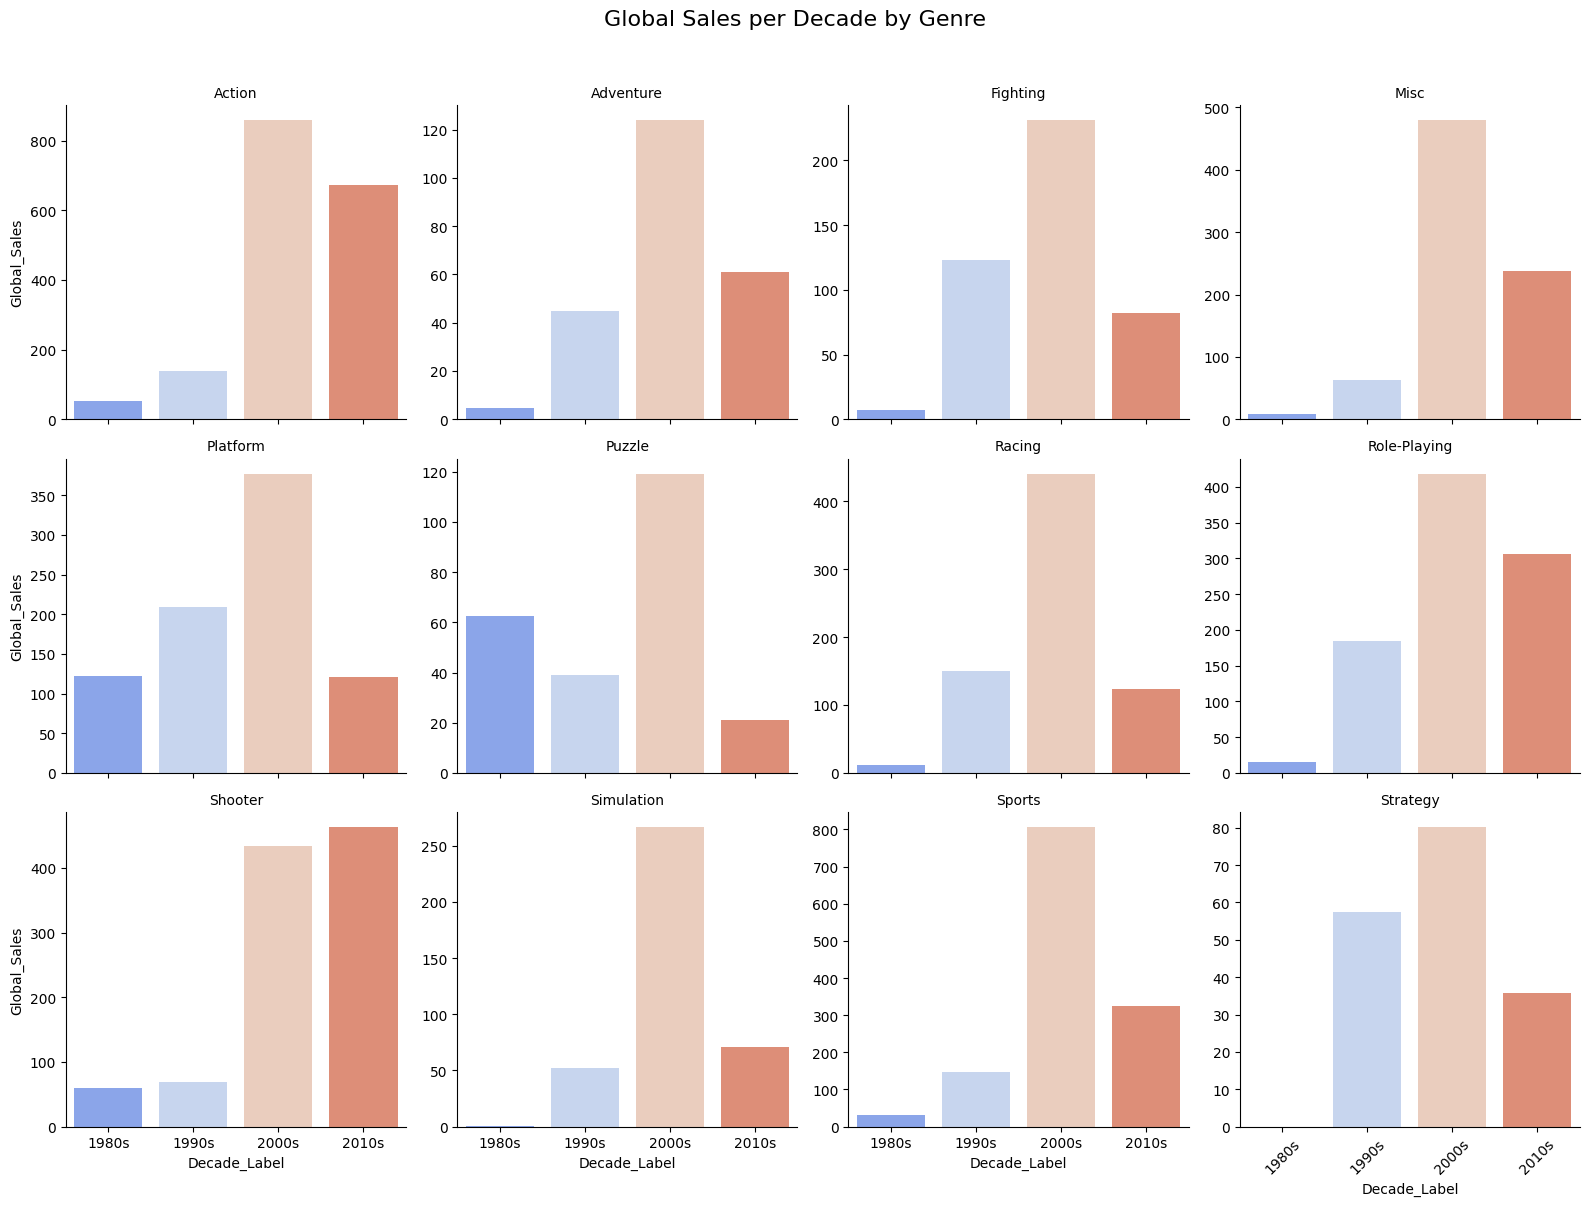

In [ ]:
# Group data
genre_facet = df.groupby(['Decade_Label', 'Genre'])['Global_Sales'].sum().reset_index()

# Facet grid
g = sns.FacetGrid(genre_facet, col='Genre', col_wrap=4, sharey=False, height=4)
g.map_dataframe(sns.barplot, x='Decade_Label', y='Global_Sales', palette='coolwarm')
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Global Sales per Decade by Genre', fontsize=16)
plt.xticks(rotation=45)
plt.show()
